# Loading the files and libraries

In [2]:
import pandas as pd
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split



import pandas as pd

# Replace this with the actual path to your extracted files
path_to_files = 'movierecom/'

# Loading each file into a Pandas DataFrame
credits = pd.read_csv(path_to_files + 'credits.csv')
keywords = pd.read_csv(path_to_files + 'keywords.csv')
links = pd.read_csv(path_to_files + 'links.csv')
links_small = pd.read_csv(path_to_files + 'links_small.csv')

# Loading the movies_metadata with dtype specified for the problematic column
movies_metadata = pd.read_csv(path_to_files + 'movies_metadata.csv', dtype={10: str})

ratings = pd.read_csv(path_to_files + 'ratings.csv', chunksize=100000)  # Adjust chunksize as needed
ratings_small = pd.read_csv(path_to_files + 'ratings_small.csv')

# Example of processing a chunk of the ratings DataFrame
# for chunk in ratings:
#     process(chunk)  # Replace 'process(chunk)' with your processing logic


# Load the Dataset

In [3]:
ratings = pd.read_csv('movierecom/ratings.csv')
print(ratings.head())


   userId  movieId  rating   timestamp
0       1      110     1.0  1425941529
1       1      147     4.5  1425942435
2       1      858     5.0  1425941523
3       1     1221     5.0  1425941546
4       1     1246     5.0  1425941556


# Prepare the Dataset for Surprise

In [4]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


# Split the Dataset for Training and Testing

In [5]:
from surprise.model_selection import train_test_split

# Split the data into a training set and a testing set (e.g., 80/20 split)
trainset, testset = train_test_split(data, test_size=0.2)

# Printing the size of the training and test sets
print('Number of users in the training set:', trainset.n_users)
print('Number of items in the training set:', trainset.n_items)
print('Number of ratings in the training set:', trainset.n_ratings)
print('Number of ratings in the test set:', len(testset))


Number of users in the training set: 269714
Number of items in the training set: 43325
Number of ratings in the training set: 20819431
Number of ratings in the test set: 5204858


# Train a Collaborative Filtering Model

In [4]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split
import pandas as pd

# Load your dataset
# Assuming you have a DataFrame 'ratings' with columns ['userID', 'itemID', 'rating']
# Replace this with your data loading logic
ratings = pd.read_csv('movierecom/ratings_small.csv')
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split the data into training and test set
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize the SVD algorithm
algo = SVD()

# Train the algorithm on the trainset
algo.fit(trainset)

# Predict ratings for the testset
predictions = algo.test(testset)

# Calculate and print the accuracy
accuracy.rmse(predictions)



RMSE: 0.9007


0.9007208682960556

# Make Predictions and Evaluate the Model

In [5]:
# Predict ratings for the testset
predictions = algo.test(testset)

# Calculate and print the accuracy
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')


RMSE: 0.9007
RMSE: 0.9007208682960556


# Make Recommendations

In [6]:
def get_top_n_recommendations(predictions, n=10):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        top_n.setdefault(uid, [])
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n_recommendations(predictions, n=10)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])


344 [260, 296, 1201, 1246, 1233, 1343, 590, 1222, 589, 778]
361 [17, 805, 14, 52, 58, 631, 609, 748, 802, 765]
294 [527, 318, 7153, 1934, 1196, 4963, 8970, 28, 4357, 1278]
466 [912, 527, 3088, 899, 50, 260, 1208, 41, 223, 2863]
282 [2762, 4993, 1197, 474, 1262, 356, 3996, 1625, 3421, 4223]
564 [2571, 2396, 235, 745, 34, 1845, 1293, 1214, 2973, 1243]
205 [1148, 116797, 56367, 91529, 31658, 55052, 49272, 2762, 48780, 81229]
236 [969, 111, 750, 898, 2010, 2194, 1230, 6286, 4422, 4034]
468 [858, 1276, 923, 2300, 2132, 1208, 2997, 1073, 3462, 2959]
67 [593, 280, 110, 474, 293, 34, 337, 364, 1097, 314]
384 [2997, 58559, 5952, 49530, 1270, 7153, 6709, 1466, 27831, 5903]
19 [1208, 1203, 296, 589, 908, 1197, 1276, 1260, 194, 951]
608 [1252, 913, 1219, 50, 2231, 307, 858, 1732, 2858, 16]
232 [1259, 898, 903, 1394, 1172, 1198, 1204, 911, 904, 1704]
652 [57669, 2096, 984, 95873, 1527, 588, 36527, 1903, 3512, 3252]
599 [1136, 745, 4973, 1148, 69122, 2788, 69844, 79702, 54259, 81845]
605 [1225, 858,

# Cross-Validation

In [7]:
from surprise.model_selection import cross_validate

# Perform cross-validation
cross_val_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print output
print(cross_val_results)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9074  0.8910  0.8973  0.9031  0.8892  0.8976  0.0069  
MAE (testset)     0.7005  0.6838  0.6896  0.6946  0.6853  0.6908  0.0061  
Fit time          1.67    1.66    1.73    1.69    1.70    1.69    0.02    
Test time         0.19    0.18    0.31    0.18    0.18    0.21    0.05    
{'test_rmse': array([0.90736962, 0.89100326, 0.8972603 , 0.90309647, 0.8891977 ]), 'test_mae': array([0.70045863, 0.68377258, 0.68964759, 0.69458959, 0.68534743]), 'fit_time': (1.6739966869354248, 1.6599960327148438, 1.731515645980835, 1.685004472732544, 1.7019999027252197), 'test_time': (0.18899893760681152, 0.18200159072875977, 0.30500030517578125, 0.18499755859375, 0.18100333213806152)}


# Hyperparameter Tuning

In [8]:
from surprise.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005], 'reg_all': [0.4, 0.6]}

# Perform grid search
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# Best RMSE score
print("Best RMSE score:", gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print("Best parameters:", gs.best_params['rmse'])


Best RMSE score: 0.9137359102881458
Best parameters: {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


# Algorithm Comparison

# Import Necessary Libraries and Algorithms

In [9]:
from surprise import SVD, NMF, KNNBasic
from surprise.model_selection import cross_validate


# Define and Evalute Algorithms

In [10]:
# Define the algorithms to compare
algorithms = [SVD(), NMF(), KNNBasic()]

# Run cross-validation and print results for each algorithm
for algorithm in algorithms:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=True)
    print(str(algorithm).split(' ')[0].split('.')[-1], ":", results['test_rmse'].mean())


Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9019  0.9017  0.9044  0.9027  0.0012  
Fit time          1.41    1.42    1.42    1.42    0.00    
Test time         0.45    0.30    0.43    0.39    0.07    
SVD : 0.9026782320654343
Evaluating RMSE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9627  0.9582  0.9578  0.9596  0.0022  
Fit time          2.58    2.94    2.75    2.76    0.15    
Test time         0.26    0.44    0.27    0.32    0.08    
NMF : 0.9595533948658549
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9776  0.9779  0.9809  0.9788

# Top-N Recommendations

# Train the Model

In [11]:
algo.fit(trainset)


# Generate Predictions for All User-Item Pairs Not in the Training Set

In [12]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

testset = trainset.build_anti_testset()
predictions = algo.test(testset)
top_n = get_top_n(predictions, n=10)


# Print the Top-N Recommendations for Each User

In [13]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])


94 [969, 527, 1204, 318, 994, 2300, 3007, 1221, 1276, 1304]
240 [1172, 260, 1228, 969, 31658, 1204, 1217, 994, 3462, 6016]
320 [7502, 858, 898, 1197, 50, 913, 1221, 6016, 994, 1203]
139 [858, 260, 994, 1221, 593, 4973, 1198, 969, 4993, 1247]
180 [318, 1172, 923, 913, 1299, 1228, 969, 1203, 296, 1252]
635 [1228, 858, 1221, 904, 1945, 969, 994, 1148, 750, 2064]
338 [1228, 1221, 1204, 899, 7502, 994, 50, 2064, 905, 1276]
84 [858, 318, 969, 994, 898, 913, 1225, 1732, 111, 541]
472 [778, 4226, 1207, 912, 2692, 56782, 78499, 969, 1256, 1208]
358 [4993, 1394, 1252, 4226, 2997, 2300, 1228, 1921, 908, 7063]
20 [109487, 7502, 913, 2064, 58559, 2467, 6016, 2788, 1203, 994]
405 [1223, 4011, 922, 41, 260, 913, 4027, 296, 2064, 2289]
324 [994, 1204, 2064, 969, 904, 899, 1217, 1148, 527, 1207]
108 [1221, 994, 4993, 1228, 858, 904, 50, 750, 1172, 898]
15 [527, 111, 2635, 3363, 3196, 1023, 194, 3167, 1466, 1172]
73 [922, 1276, 1230, 1244, 1203, 898, 3435, 926, 1252, 994]
379 [1221, 1254, 260, 858, 994,

# Content-based Filtering

# Data Preparation

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

movies = pd.read_csv('movierecom/movies_metadata.csv')
print(movies.head())


   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

C:\Users\kavidha\AppData\Local\Temp\ipykernel_2420\250679854.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movierecom/movies_metadata.csv')


# Feature Engineering

In [23]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])


# Calculate Similarity

In [24]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


# Recommendation Function

In [25]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]

recommendations = get_recommendations('Jumanji')
print(recommendations)


59                    The Indian in the Cupboard
892                             The Wizard of Oz
1858                                   Labyrinth
1984                                Return to Oz
4766    Harry Potter and the Philosopher's Stone
5406                         Clash of the Titans
5678     Harry Potter and the Chamber of Secrets
6101          Journey to the Center of the Earth
7011                                   Peter Pan
7411                     Jason and the Argonauts
Name: title, dtype: object


# User and Movie Embeddings Visualization

# Train the SVD Model

In [26]:
from surprise import SVD
algo = SVD(n_factors=20)
algo.fit(trainset)


# Extract Embeddings

In [27]:
user_embeddings = algo.pu
movie_embeddings = algo.qi


# Visualize with PCA 

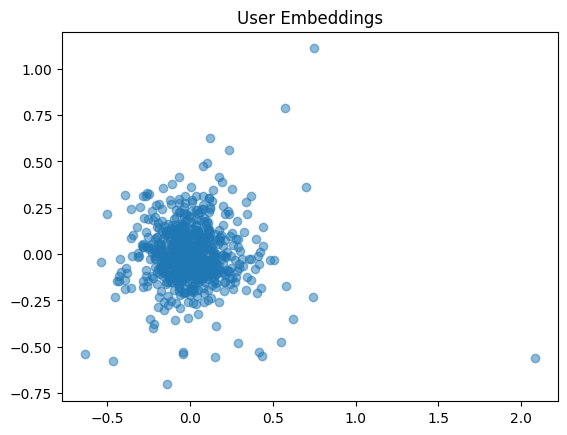

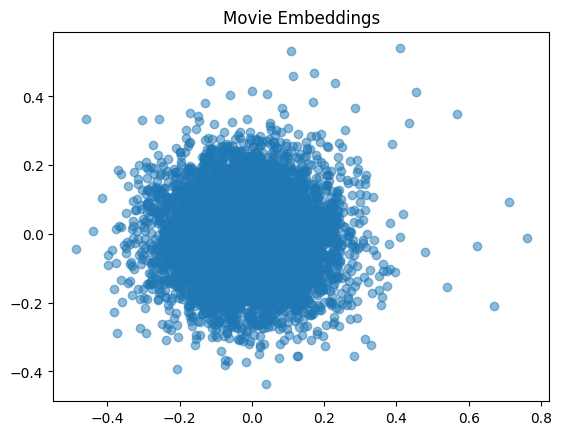

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
user_embeddings_2d = pca.fit_transform(user_embeddings)
movie_embeddings_2d = pca.transform(movie_embeddings)

# Plotting user embeddings
plt.scatter(user_embeddings_2d[:, 0], user_embeddings_2d[:, 1], alpha=0.5)
plt.title("User Embeddings")
plt.show()

# Plotting movie embeddings
plt.scatter(movie_embeddings_2d[:, 0], movie_embeddings_2d[:, 1], alpha=0.5)
plt.title("Movie Embeddings")
plt.show()


# Handling the cold start problem

# Fallback to Non-Personalized  Recommendations

In [29]:
# Assuming 'ratings' is your DataFrame
most_rated_movies = ratings.groupby('movieId').size().sort_values(ascending=False).head(10)
print("Top 10 Recommended Movies for New Users:")
print(most_rated_movies)


Top 10 Recommended Movies for New Users:
movieId
356     341
296     324
318     311
593     304
260     291
480     274
2571    259
1       247
527     244
589     237
dtype: int64
